In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
xls = pd.ExcelFile('Results_data.xls')
sheetnames = xls.sheet_names
print(sheetnames)  # see all sheet names

# df_German_1 = pd.read_excel(xls, sheetnames[0])
# df_German_2 = pd.read_excel(xls, sheetnames[1])
# df_German_3 = pd.read_excel(xls, sheetnames[2])
# df_German_4 = pd.read_excel(xls, sheetnames[3])
# df_German_5 = pd.read_excel(xls, sheetnames[4])

# df_Itlian_1 = pd.read_excel(xls, sheetnames[5])
# df_Itlian_2 = pd.read_excel(xls, sheetnames[6])
# df_Itlian_3 = pd.read_excel(xls, sheetnames[7])
# df_Itlian_4 = pd.read_excel(xls, sheetnames[8])
# df_Itlian_5 = pd.read_excel(xls, sheetnames[9])

['German_request_matrix_1', 'German_request_matrix_2', 'German_request_matrix_3', 'German_request_matrix_4', 'German_request_matrix_5', 'Italian_request_matrix_1', 'Italian_request_matrix_2', 'Italian_request_matrix_3', 'Italian_request_matrix_4', 'Italian_request_matrix_5']


First compare data of German

In [78]:
def addlabels(x,y,rows,cloumns,index):
    for j in range(len(x)):
        plt.subplot(rows,cloumns,index).text(x[j], y[j], y[j], ha = 'center',weight = 'bold', fontsize=12)

**German scenario**

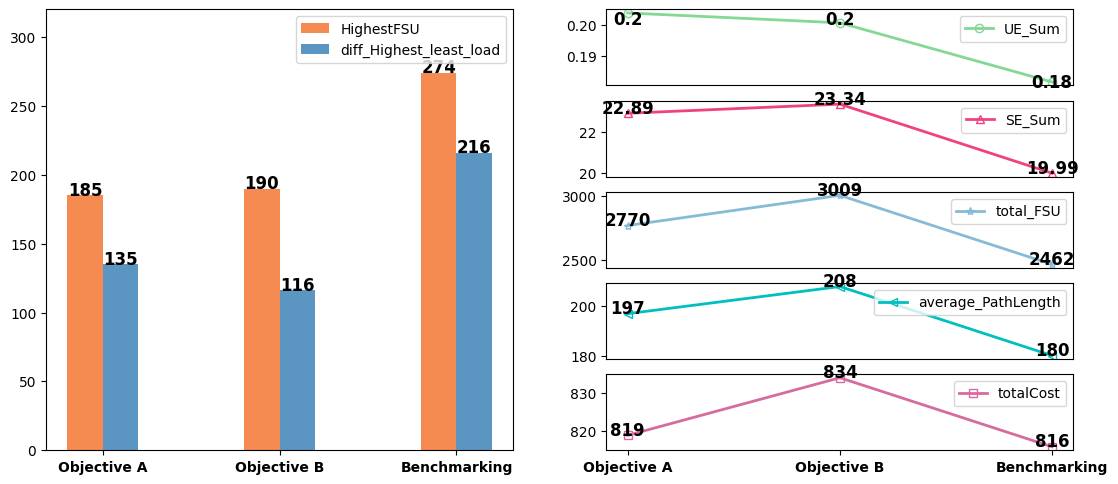

In [79]:
plt.subplots(figsize=(11,5))

X = ['Objective A','Objective B','Benchmarking']
X_axis = np.arange(len(X))
plt.tight_layout()
index = [ (1,2,1),(5,2,2),(5,2,4),(5,2,6),(5,2,8),(5,2,10)]
for nrows, ncols, plot_number in index:
    plt.subplot(nrows, ncols, plot_number)

for i in range(5):
    plt.clf()

    df = pd.read_excel(xls, sheetnames[i])
    req_HighestFSU = np.array([df['HighestFSU_objA'].max(),df['HighestFSU_objB'].max(),df['HighestFSU_Benchmark'].max()],dtype = 'int')
    plt.subplot(1,2,1).bar(X_axis - 0.1, req_HighestFSU, 0.2, label = 'HighestFSU',color='#F58B51')
    addlabels(X_axis - 0.1,req_HighestFSU,1,2,1)

    diff_Highest_least_load = 320 * np.array([df['LinkUsage_objA'].max()-df['LinkUsage_objA'].min(),df['LinkUsage_objB'].max()-df['LinkUsage_objB'].min(),df['LinkUsage_Benchmark'].max()-df['LinkUsage_Benchmark'].min()])
    plt.subplot(1,2,1).bar(X_axis + 0.1, diff_Highest_least_load, 0.2, label = 'diff_Highest_least_load',color='#5B96C2')
    addlabels(X_axis + 0.1,diff_Highest_least_load.astype(int),1,2,1)

    plt.subplot(1,2,1).set_xticks(X_axis, X,weight = 'bold')
    # plt.subplot(1,2,1).set_ylabel("Request_metrix_{}".format(i+1),fontsize=15)
    plt.subplot(1,2,1).set_ylim([0,320])
    # plt.subplot(1,2,1).set_title("comparison of peroformance of Objective A, Objective B and Benchmarking")
    plt.subplot(1,2,1).legend()
    

    UE_Sum = np.array([df['UE_objA'].sum(),df['UE_objB'].sum(),df['UE_Benchmark'].sum()])
    plt.subplot(5,2,2).plot(X_axis, UE_Sum, label = 'UE_Sum',marker='o',markerfacecolor='none',linestyle='solid',linewidth=2,color = '#83D893')
    plt.subplot(5,2,2).get_xaxis().set_visible(False)
    plt.subplot(5,2,2).legend(loc='upper right')
    addlabels(X_axis,np.round(UE_Sum,2),5,2,2)

    SE_Sum = np.array([df['SE_objA'].sum(),df['SE_objB'].sum(),df['SE_Benchmark'].sum()])
    plt.subplot(5,2,4).plot(X_axis, SE_Sum, label = 'SE_Sum',marker="^",markerfacecolor='none',linestyle='solid',linewidth=2,color = '#F04282')
    plt.subplot(5,2,4).get_xaxis().set_visible(False)
    plt.subplot(5,2,4).legend(loc='upper right')
    addlabels(X_axis,np.round(SE_Sum,2),5,2,4)

    total_FSU = np.array([df['TotalFSU_objA'].dropna(),df['TotalFSU_objB'].dropna(),df['TotalFSU_Benchmark'].dropna()],dtype = 'int')
    plt.subplot(5,2,6).plot(X_axis, total_FSU, label = 'total_FSU',marker='*',markerfacecolor='none',linestyle='solid',linewidth=2,color = '#86BBD8')
    plt.subplot(5,2,6).get_xaxis().set_visible(False)
    plt.subplot(5,2,6).legend(loc='upper right')
    addlabels(X_axis,np.concatenate(total_FSU),5,2,6)
    

    average_PathLength = np.array([df['PathLen_objA'],df['PathLen_objB'],df['PathLen_Benchmark']],dtype = 'int')
    plt.subplot(5,2,8).plot(X_axis,np.mean(average_PathLength,axis=1,dtype = 'int'), label = 'average_PathLength',marker='<',markerfacecolor='none',linestyle='solid',linewidth=2,color = 'c')
    plt.subplot(5,2,8).get_xaxis().set_visible(False)
    plt.subplot(5,2,8).legend(loc='upper right')
    addlabels(X_axis,np.mean(average_PathLength,axis=1,dtype = 'int'),5,2,8)


    totalCost = np.array([df['TotalCost_objA'].dropna(),df['TotalCost_objB'].dropna(),df['TotalCost_Benchmark'].dropna()],dtype = 'int')
    plt.subplot(5,2,10).plot(X_axis, totalCost, label = 'totalCost',marker='s',markerfacecolor='none',linestyle='solid',linewidth=2,color = '#D66BA0')
    plt.subplot(5,2,10).set_xticks(X_axis, X, weight = 'bold')
    plt.subplot(5,2,10).legend(loc='upper right')
    addlabels(X_axis,np.concatenate(totalCost),5,2,10)

    # plt.suptitle('Performance comparison of Obiective A, Obiective B and Benchmarking Algorithm ')

    # save the figures into png file
    plt.savefig('German_Request_{}.png'.format(i+1),dpi=500)

**Itlian scenario**

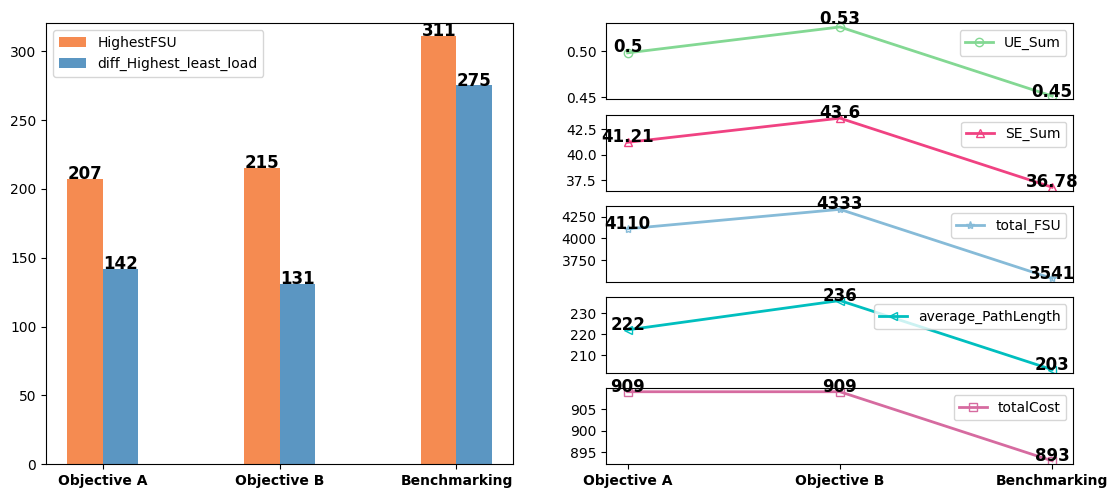

In [80]:
plt.subplots(figsize=(11,5))

X = ['Objective A','Objective B','Benchmarking']
X_axis = np.arange(len(X))
plt.tight_layout()
index = [ (1,2,1),(5,2,2),(5,2,4),(5,2,6),(5,2,8),(5,2,10)]
for nrows, ncols, plot_number in index:
    plt.subplot(nrows, ncols, plot_number)

for i in range(5,10):
    plt.clf()

    df = pd.read_excel(xls, sheetnames[i])
    req_HighestFSU = np.array([df['HighestFSU_objA'].max(),df['HighestFSU_objB'].max(),df['HighestFSU_Benchmark'].max()],dtype = 'int')
    plt.subplot(1,2,1).bar(X_axis - 0.1, req_HighestFSU, 0.2, label = 'HighestFSU',color='#F58B51')
    addlabels(X_axis - 0.1,req_HighestFSU,1,2,1)

    diff_Highest_least_load = 320 * np.array([df['LinkUsage_objA'].max()-df['LinkUsage_objA'].min(),df['LinkUsage_objB'].max()-df['LinkUsage_objB'].min(),df['LinkUsage_Benchmark'].max()-df['LinkUsage_Benchmark'].min()])
    plt.subplot(1,2,1).bar(X_axis + 0.1, diff_Highest_least_load, 0.2, label = 'diff_Highest_least_load',color='#5B96C2')
    addlabels(X_axis + 0.1,diff_Highest_least_load.astype(int),1,2,1)

    plt.subplot(1,2,1).set_xticks(X_axis, X,weight = 'bold')
    # plt.subplot(1,2,1).set_ylabel("Request_metrix_{}".format(i-4),fontsize=15)
    plt.subplot(1,2,1).set_ylim([0,320])
    # plt.subplot(1,2,1).set_title("comparison of peroformance of Objective A, Objective B and Benchmarking")
    plt.subplot(1,2,1).legend()
    

    UE_Sum = np.array([df['UE_objA'].sum(),df['UE_objB'].sum(),df['UE_Benchmark'].sum()])
    plt.subplot(5,2,2).plot(X_axis, UE_Sum, label = 'UE_Sum',marker='o',markerfacecolor='none',linestyle='solid',linewidth=2,color = '#83D893')
    plt.subplot(5,2,2).get_xaxis().set_visible(False)
    plt.subplot(5,2,2).legend(loc='upper right')
    addlabels(X_axis,np.round(UE_Sum,2),5,2,2)

    SE_Sum = np.array([df['SE_objA'].sum(),df['SE_objB'].sum(),df['SE_Benchmark'].sum()])
    plt.subplot(5,2,4).plot(X_axis, SE_Sum, label = 'SE_Sum',marker="^",markerfacecolor='none',linestyle='solid',linewidth=2,color = '#F04282')
    plt.subplot(5,2,4).get_xaxis().set_visible(False)
    plt.subplot(5,2,4).legend(loc='upper right')
    addlabels(X_axis,np.round(SE_Sum,2),5,2,4)

    total_FSU = np.array([df['TotalFSU_objA'].dropna(),df['TotalFSU_objB'].dropna(),df['TotalFSU_Benchmark'].dropna()],dtype = 'int')
    plt.subplot(5,2,6).plot(X_axis, total_FSU, label = 'total_FSU',marker='*',markerfacecolor='none',linestyle='solid',linewidth=2,color = '#86BBD8')
    plt.subplot(5,2,6).get_xaxis().set_visible(False)
    plt.subplot(5,2,6).legend(loc='upper right')
    addlabels(X_axis,np.concatenate(total_FSU),5,2,6)
    

    average_PathLength = np.array([df['PathLen_objA'],df['PathLen_objB'],df['PathLen_Benchmark']],dtype = 'int')
    plt.subplot(5,2,8).plot(X_axis,np.mean(average_PathLength,axis=1,dtype = 'int'), label = 'average_PathLength',marker='<',markerfacecolor='none',linestyle='solid',linewidth=2,color = 'c')
    plt.subplot(5,2,8).get_xaxis().set_visible(False)
    plt.subplot(5,2,8).legend(loc='upper right')
    addlabels(X_axis,np.mean(average_PathLength,axis=1,dtype = 'int'),5,2,8)


    totalCost = np.array([df['TotalCost_objA'].dropna(),df['TotalCost_objB'].dropna(),df['TotalCost_Benchmark'].dropna()],dtype = 'int')
    plt.subplot(5,2,10).plot(X_axis, totalCost, label = 'totalCost',marker='s',markerfacecolor='none',linestyle='solid',linewidth=2,color = '#D66BA0')
    plt.subplot(5,2,10).set_xticks(X_axis, X,weight = 'bold')
    plt.subplot(5,2,10).legend(loc='upper right')
    addlabels(X_axis,np.concatenate(totalCost),5,2,10)

    # plt.suptitle('Performance comparison of Obiective A, Obiective B and Benchmarking Algorithm ')

    # save the figures into png file
    plt.savefig('Italian_Request_{}.png'.format(i-4),dpi=500)

The following code is the old version, it generate really ugly figures, so I won't use it.

In [81]:
# def addlabels(x,y,rows,cloumns):
#     for j in range(len(x)):
#         ax[rows,cloumns].text(j, y[j], y[j], ha = 'center')

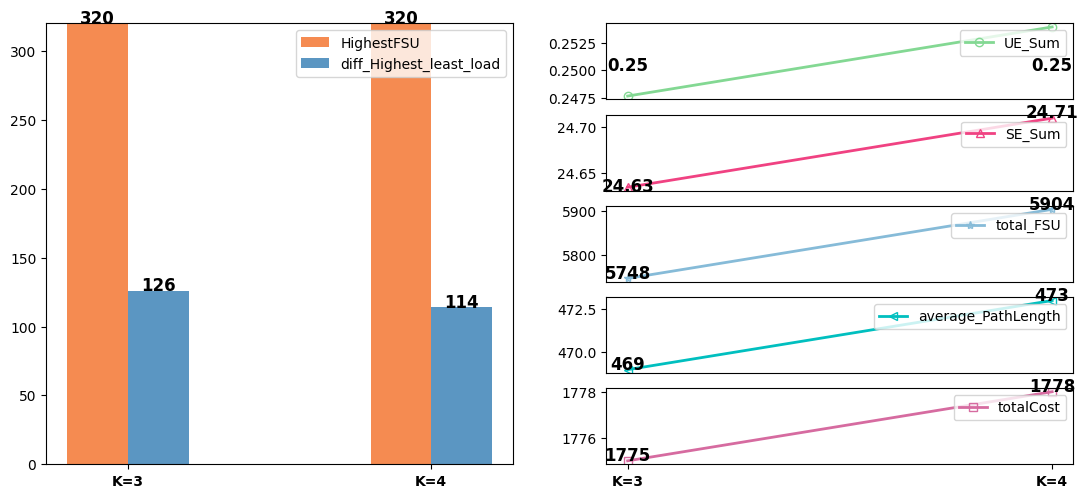

In [82]:
## GERMAN SCENARIO WITH 1+1 PATH PROTECTION
plt.subplots(figsize=(11,5))

X = ['K=3','K=4']
X_axis = np.arange(len(X))
plt.tight_layout()
index = [ (1,2,1),(5,2,2),(5,2,4),(5,2,6),(5,2,8),(5,2,10)]
for nrows, ncols, plot_number in index:
    plt.subplot(nrows, ncols, plot_number)

for i in range(5):
    plt.clf()

    df = pd.read_excel(xls, sheetnames[i])
    req_HighestFSU = np.array([df['HighestFSU_ProtectionA'].max(),df['HighestFSU_ProtectionB'].max()],dtype = 'int')
    plt.subplot(1,2,1).bar(X_axis - 0.1, req_HighestFSU, 0.2, label = 'HighestFSU',color='#F58B51')
    addlabels(X_axis - 0.1,req_HighestFSU,1,2,1)

    diff_Highest_least_load = 320 * np.array([df['LinkUsage_ProtectionA'].max()-df['LinkUsage_ProtectionA'].min(),df['LinkUsage_ProtectionB'].max()-df['LinkUsage_ProtectionB'].min()])
    plt.subplot(1,2,1).bar(X_axis + 0.1, diff_Highest_least_load, 0.2, label = 'diff_Highest_least_load',color='#5B96C2')
    addlabels(X_axis + 0.1,diff_Highest_least_load.astype(int),1,2,1)

    plt.subplot(1,2,1).set_xticks(X_axis, X,weight = 'bold')
    # plt.subplot(1,2,1).set_ylabel("Request_metrix_{}".format(i+1),fontsize=15)
    plt.subplot(1,2,1).set_ylim([0,320])
    # plt.subplot(1,2,1).set_title("comparison of peroformance of Objective A, Objective B and Benchmarking")
    plt.subplot(1,2,1).legend()
    

    UE_Sum = np.array([df['UE_ProtectionA'].sum(),df['UE_ProtectionB'].sum()])
    plt.subplot(5,2,2).plot(X_axis, UE_Sum, label = 'UE_Sum',marker='o',markerfacecolor='none',linestyle='solid',linewidth=2,color = '#83D893')
    plt.subplot(5,2,2).get_xaxis().set_visible(False)
    plt.subplot(5,2,2).legend(loc='upper right')
    addlabels(X_axis,np.round(UE_Sum,2),5,2,2)

    SE_Sum = np.array([df['SE_ProtectionA'].sum(),df['SE_ProtectionB'].sum()])
    plt.subplot(5,2,4).plot(X_axis, SE_Sum, label = 'SE_Sum',marker="^",markerfacecolor='none',linestyle='solid',linewidth=2,color = '#F04282')
    plt.subplot(5,2,4).get_xaxis().set_visible(False)
    plt.subplot(5,2,4).legend(loc='upper right')
    addlabels(X_axis,np.round(SE_Sum,2),5,2,4)

    total_FSU = np.array([df['TotalFSU_ProtectionA'].dropna(),df['TotalFSU_ProtectionB'].dropna()],dtype = 'int')
    plt.subplot(5,2,6).plot(X_axis, total_FSU, label = 'total_FSU',marker='*',markerfacecolor='none',linestyle='solid',linewidth=2,color = '#86BBD8')
    plt.subplot(5,2,6).get_xaxis().set_visible(False)
    plt.subplot(5,2,6).legend(loc='upper right')
    addlabels(X_axis,np.concatenate(total_FSU),5,2,6)
    

    average_PathLength = np.array([df['PathLen_ProtectionA'],df['PathLen_ProtectionB']],dtype = 'int')
    plt.subplot(5,2,8).plot(X_axis,np.mean(average_PathLength,axis=1,dtype = 'int'), label = 'average_PathLength',marker='<',markerfacecolor='none',linestyle='solid',linewidth=2,color = 'c')
    plt.subplot(5,2,8).get_xaxis().set_visible(False)
    plt.subplot(5,2,8).legend(loc='upper right')
    addlabels(X_axis,np.mean(average_PathLength,axis=1,dtype = 'int'),5,2,8)


    totalCost = np.array([df['TotalCost_ProtectionA'].dropna(),df['TotalCost_ProtectionB'].dropna()],dtype = 'int')
    plt.subplot(5,2,10).plot(X_axis, totalCost, label = 'totalCost',marker='s',markerfacecolor='none',linestyle='solid',linewidth=2,color = '#D66BA0')
    plt.subplot(5,2,10).set_xticks(X_axis, X, weight = 'bold')
    plt.subplot(5,2,10).legend(loc='upper right')
    addlabels(X_axis,np.concatenate(totalCost),5,2,10)

    # plt.suptitle('Performance comparison of Obiective A, Obiective B and Benchmarking Algorithm ')

    # save the figures into png file
    plt.savefig('German_Request_Protection_{}.png'.format(i+1),dpi=500)

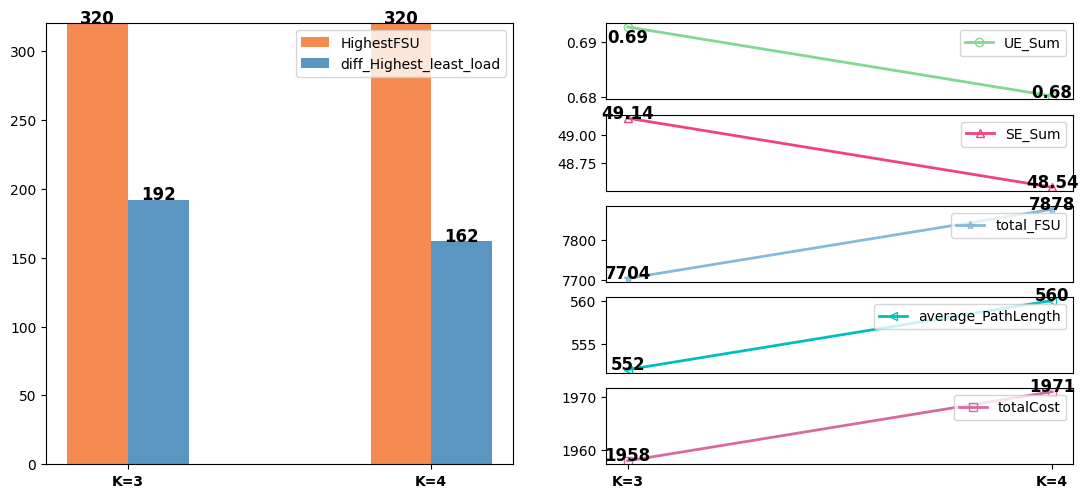

In [83]:
  plt.subplots(figsize=(11,5))

X = ['K=3','K=4']
X_axis = np.arange(len(X))
plt.tight_layout()
index = [ (1,2,1),(5,2,2),(5,2,4),(5,2,6),(5,2,8),(5,2,10)]
for nrows, ncols, plot_number in index:
    plt.subplot(nrows, ncols, plot_number)

for i in range(5,10):
    plt.clf()

    df = pd.read_excel(xls, sheetnames[i])
    req_HighestFSU = np.array([df['HighestFSU_ProtectionA'].max(),df['HighestFSU_ProtectionB'].max()],dtype = 'int')
    plt.subplot(1,2,1).bar(X_axis - 0.1, req_HighestFSU, 0.2, label = 'HighestFSU',color='#F58B51')
    addlabels(X_axis - 0.1,req_HighestFSU,1,2,1)

    diff_Highest_least_load = 320 * np.array([df['LinkUsage_ProtectionA'].max()-df['LinkUsage_ProtectionA'].min(),df['LinkUsage_ProtectionB'].max()-df['LinkUsage_ProtectionB'].min()])
    plt.subplot(1,2,1).bar(X_axis + 0.1, diff_Highest_least_load, 0.2, label = 'diff_Highest_least_load',color='#5B96C2')
    addlabels(X_axis + 0.1,diff_Highest_least_load.astype(int),1,2,1)

    plt.subplot(1,2,1).set_xticks(X_axis, X,weight = 'bold')
    # plt.subplot(1,2,1).set_ylabel("Request_metrix_{}".format(i+1),fontsize=15)
    plt.subplot(1,2,1).set_ylim([0,320])
    # plt.subplot(1,2,1).set_title("comparison of peroformance of Objective A, Objective B and Benchmarking")
    plt.subplot(1,2,1).legend()
    

    UE_Sum = np.array([df['UE_ProtectionA'].sum(),df['UE_ProtectionB'].sum()])
    plt.subplot(5,2,2).plot(X_axis, UE_Sum, label = 'UE_Sum',marker='o',markerfacecolor='none',linestyle='solid',linewidth=2,color = '#83D893')
    plt.subplot(5,2,2).get_xaxis().set_visible(False)
    plt.subplot(5,2,2).legend(loc='upper right')
    addlabels(X_axis,np.round(UE_Sum,2),5,2,2)

    SE_Sum = np.array([df['SE_ProtectionA'].sum(),df['SE_ProtectionB'].sum()])
    plt.subplot(5,2,4).plot(X_axis, SE_Sum, label = 'SE_Sum',marker="^",markerfacecolor='none',linestyle='solid',linewidth=2,color = '#F04282')
    plt.subplot(5,2,4).get_xaxis().set_visible(False)
    plt.subplot(5,2,4).legend(loc='upper right')
    addlabels(X_axis,np.round(SE_Sum,2),5,2,4)

    total_FSU = np.array([df['TotalFSU_ProtectionA'].dropna(),df['TotalFSU_ProtectionB'].dropna()],dtype = 'int')
    plt.subplot(5,2,6).plot(X_axis, total_FSU, label = 'total_FSU',marker='*',markerfacecolor='none',linestyle='solid',linewidth=2,color = '#86BBD8')
    plt.subplot(5,2,6).get_xaxis().set_visible(False)
    plt.subplot(5,2,6).legend(loc='upper right')
    addlabels(X_axis,np.concatenate(total_FSU),5,2,6)
    

    average_PathLength = np.array([df['PathLen_ProtectionA'],df['PathLen_ProtectionB']],dtype = 'int')
    plt.subplot(5,2,8).plot(X_axis,np.mean(average_PathLength,axis=1,dtype = 'int'), label = 'average_PathLength',marker='<',markerfacecolor='none',linestyle='solid',linewidth=2,color = 'c')
    plt.subplot(5,2,8).get_xaxis().set_visible(False)
    plt.subplot(5,2,8).legend(loc='upper right')
    addlabels(X_axis,np.mean(average_PathLength,axis=1,dtype = 'int'),5,2,8)


    totalCost = np.array([df['TotalCost_ProtectionA'].dropna(),df['TotalCost_ProtectionB'].dropna()],dtype = 'int')
    plt.subplot(5,2,10).plot(X_axis, totalCost, label = 'totalCost',marker='s',markerfacecolor='none',linestyle='solid',linewidth=2,color = '#D66BA0')
    plt.subplot(5,2,10).set_xticks(X_axis, X, weight = 'bold')
    plt.subplot(5,2,10).legend(loc='upper right')
    addlabels(X_axis,np.concatenate(totalCost),5,2,10)

    # plt.suptitle('Performance comparison of Obiective A, Obiective B and Benchmarking Algorithm ')

    # save the figures into png file
    plt.savefig('Italian_Request_Protection_{}.png'.format(i-4),dpi=500)

In [84]:
# figure, ax = plt.subplots(5, 2,figsize=(9, 18))
# figure.tight_layout(pad=5.0)

# # X = ['Objective A','Objective B','Benchmarking']
# X = ['Objective A','Objective B']
# X_axis = np.arange(len(X))

# for i in range(5):

#     df = pd.read_excel(xls, sheetnames[i])
#     req_HighestFSU = np.array([df['HighestFSU_objA'].max(),df['HighestFSU_objB'].max()],dtype = 'int')
#     ax[i,0].bar(X_axis - 0.1, req_HighestFSU, 0.2, label = 'HighestFSU')
#     addlabels(X_axis - 0.3,req_HighestFSU,i,0)

#     diff_Highest_least_load = 320 * np.array([df['LinkUsage_objA'].max()-df['LinkUsage_objA'].min(),df['LinkUsage_objB'].max()-df['LinkUsage_objB'].min()])
#     ax[i,0].bar(X_axis + 0.1, diff_Highest_least_load, 0.2, label = 'diff_Highest_least_load')
#     addlabels(X_axis + 0.3,diff_Highest_least_load.astype(int),i,0)

#     ax2 = ax[i,0].twinx()
#     # ax2.set_ylim(-1,)
#     UE_Sum = np.array([df['UE_objA'].sum(),df['UE_objB'].sum()])
#     ax2.plot(X_axis, UE_Sum, label = 'UE_Sum',marker='o',linestyle = 'dashed',color = 'r')

#     SE_Sum = np.array([df['SE_objA'].sum(),df['SE_objB'].sum()])
#     ax2.plot(X_axis, SE_Sum, label = 'SE_Sum',marker="^",linestyle = 'dashed',color = 'green')

#     ax[i,0].set_xticks(X_axis, X)
#     ax[i,0].set_ylabel("Request_metrix_{}".format(i+1))
#     ax[i,0].set_ylim([0,200])
#     ax[i,0].set_title("comparison of peroformance of Objective A, Objective B and Benchmarking")
#     ax[i,0].legend(loc="upper right")
#     ax2.legend(loc=0)

#     # figure2, ax3 = plt.subplots(5, 1,figsize=(18, 18))


#     total_FSU = np.array([df['TotalFSU_objA'].dropna(),df['TotalFSU_objB'].dropna()],dtype = 'int')
#     ax[i,1].plot(X_axis, total_FSU, label = 'total_FSU',marker='o',linestyle = 'dashed',color = 'r')


#     average_PathLength = np.array([df['PathLen_objA'],df['PathLen_objB']],dtype = 'int')
#     ax[i,1].plot(X_axis,np.mean(average_PathLength,axis=1,dtype = 'int'), label = 'average_PathLength',marker="^",linestyle = 'dashed',color = 'green')

#     totalCost = np.array([df['TotalCost_objA'].dropna(),df['TotalCost_objB'].dropna()],dtype = 'int')
#     ax[i,1].plot(X_axis, totalCost, label = 'totalCost',marker='o',linestyle = 'dashed',color = 'black')

